In [8]:
import os
import pandas as pd
import textstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from datetime import datetime
from bs4 import BeautifulSoup

# Use a raw string to handle spaces and slashes correctly
folder_path = r"C:\Users\Kanis\Desktop\Python\Untitled Folder\policy-texts\policies_fromseg_custom"

# List files
files = os.listdir(folder_path)
print(len(files))
print(files[0:1])

# Open a specific file
file_path = os.path.join(folder_path, "721ebea55e45486b0fe2e7067d8b3097a588b1f6ad6a442ccc31af7b.txt")

with open(file_path, "r", encoding="utf-8") as f:
    file_contents = f.read()
    print(file_contents[:100])


56416
['0000180e47154fd3768cdc1b692f705231f04606dc6845d09b2facac.txt']
The Wayback Machine - https://web.archive.org/web/20151202020442/http://www.lijit.com:80/company/leg


In [4]:
metadata_path = r"C:\Users\Kanis\Desktop\Python\Untitled Folder\policy-metadata\policy-metadata\policy-metadata.csv"
metadata_df = pd.read_csv(metadata_path)
metadata_df.head()

,Unnamed: 0,hash,year,month,timestamp,uri,rank,flesch,cl,smog,...,count_privsh,count_safehar,count_truste,count_dpo,count_eprivacy,numpassive,numobfs,obfs_sents,waybackurl,policyid
0,0,70b320cc4c912e2c3380b1bfee960232bf4a7c1440c952...,2007,5,20070526003032,screencast-o-matic.com,9483.0,31.437442,13.859725,16.831651,...,0,0,0,0,0,14.0,201.0,62.0,https://web.archive.org/web/20070526003032/htt...,4695
1,1,70b320cc4c912e2c3380b1bfee960232bf4a7c1440c952...,2007,6,20070612022642,screencast-o-matic.com,9483.0,31.437442,13.859725,16.831651,...,0,0,0,0,0,14.0,201.0,62.0,https://web.archive.org/web/20070612022642/htt...,4695
2,2,70b320cc4c912e2c3380b1bfee960232bf4a7c1440c952...,2007,7,20070701013914,screencast-o-matic.com,9483.0,31.437442,13.859725,16.831651,...,0,0,0,0,0,14.0,201.0,62.0,https://web.archive.org/web/20070701013914/htt...,4695
3,3,70b320cc4c912e2c3380b1bfee960232bf4a7c1440c952...,2007,8,20070821074550,screencast-o-matic.com,9483.0,31.437442,13.859725,16.831651,...,0,0,0,0,0,14.0,201.0,62.0,https://web.archive.org/web/20070821074550/htt...,4695
4,4,70b320cc4c912e2c3380b1bfee960232bf4a7c1440c952...,2007,9,20070922015558,screencast-o-matic.com,9483.0,31.437442,13.859725,16.831651,...,0,0,0,0,0,14.0,201.0,62.0,https://web.archive.org/web/20070922015558/htt...,4695


In [ ]:
# Define a function to calculate all readability scores
def compute_readability_metrics(test):
    flesch_reading_ease = textstat.flesch_reading_ease(text)
    flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
    coleman_liau_index = textstat.coleman_liau_index(text)
    dale_chall_score = textstat.dale_chall_readability_score(text)
    smog_index = textstat.smog_index(text)
    return {
        "Flesch Reading Ease": flesch_reading_ease,
        "Flesch-Kincaid Grade": flesch_kincaid_grade,
        "Coleman-Liau Index": coleman_liau_index, 
        "Dale-Chall Score": dale_chall_score,
        "SMOG Index": smog_index,
    }
text = file_contents
metrics = compute_readability_metrics(text)

# Loop through the resulting dictionary and print each score 
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value}")

Flesch Reading Ease: 31.862040052477283
Flesch-Kincaid Grade: 15.466304213613213
Coleman-Liau Index: 13.719185059422756
Dale-Chall Score: 12.283052060503165
SMOG Index: 16.52667757954773


In [ ]:
obtained_metrics = {
    "Flesch Reading Ease": 35.81,
    "SMOG Index": 16.5,
    "Coleman-Liau Index": 13.64,
    "Flesch-Kincaid Grade": 14.9,
    "Dale-Chall Score": 9.39
}

df = metadata_df  

# Map our readability metric names to their corresponding column names in the metadata CSV
overlap_metrics = {
    "Flesch Reading Ease": "flesch",
    "SMOG Index": "smog",
    "Coleman-Liau Index": "cl"
}
# Compare each of our calculated readability metrics with the dataset values
for obtained_name, csv_name in overlap_metrics.items():
    if csv_name in df.columns:
        csv_mean = df[csv_name].mean(skipna=True)
        obtained_val = obtained_metrics[obtained_name]
        # Print both values and the difference between them
        print(f"\n------------ {obtained_name} ({csv_name}) Comparison -------------")
        print(f"Obtained value: {obtained_val:.2f}")
        print(f"CSV mean:   {csv_mean:.2f}")
        print(f"Difference: {abs(obtained_val - csv_mean):.2f}")



------------ Flesch Reading Ease (flesch) Comparison -------------
Obtained value: 35.81
CSV mean:   32.87
Difference: 2.94

------------ SMOG Index (smog) Comparison -------------
Obtained value: 16.50
CSV mean:   16.48
Difference: 0.02

------------ Coleman-Liau Index (cl) Comparison -------------
Obtained value: 13.64
CSV mean:   13.32
Difference: 0.32


In [9]:
policy_path = r"C:\Users\Kanis\Desktop\Python\Untitled Folder\policy-texts\policies_fromseg_custom"
output_csv = "sentiment_results.csv"
os.makedirs("plots", exist_ok=True)

# Function to extract the publication year from a policy text using regex patterns
def extract_year(text):
    patterns = [r"\b(20\d{2})\b", r"\b(19\d{2})\b"]  
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return int(match.group(1))
    return None 

# Function to analyze each policy text for sentiment and metadata
def analyze_policy(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        soup = BeautifulSoup(f.read(), 'html.parser')
        text = soup.get_text(separator=' ', strip=True)
        analysis = TextBlob(text)
        year = extract_year(text)
        return {
            'filename': os.path.basename(file_path),
            'year': year,
            'polarity': analysis.sentiment.polarity,
            'subjectivity': analysis.sentiment.subjectivity,
            'word_count': len(text.split())
        }

# Loop through all text files in the folder and analyze them one by one
results = []
for filename in os.listdir(policy_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(policy_path, filename)
        results.append(analyze_policy(file_path))
df = pd.DataFrame(results)
df.to_csv(output_csv, index=False)
print("\n Corpus Summary Statistics:")
print(df[['polarity', 'subjectivity']].describe())


 Corpus Summary Statistics:
           polarity  subjectivity
count  56416.000000  56416.000000
mean       0.078477      0.394991
std        0.044107      0.048476
min       -0.316667      0.000000
25%        0.054563      0.368062
50%        0.072549      0.392725
75%        0.094996      0.418789
max        0.633333      0.833333


In [10]:
sentiment_path = "sentiment_results.csv"
sentiment_df = pd.read_csv(sentiment_path)

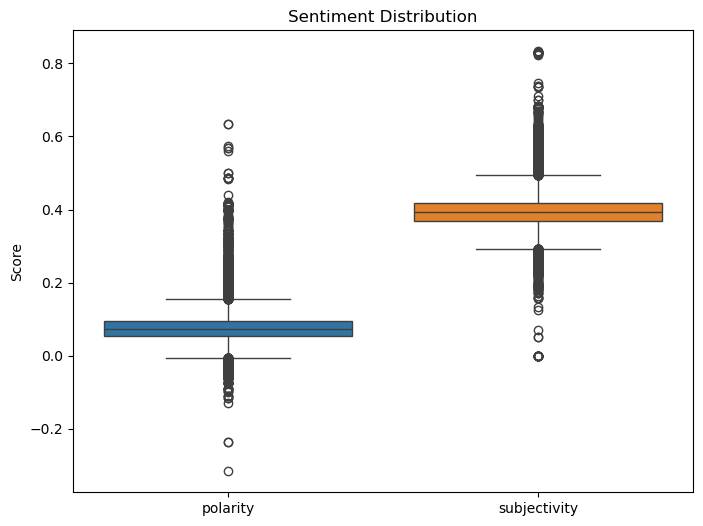

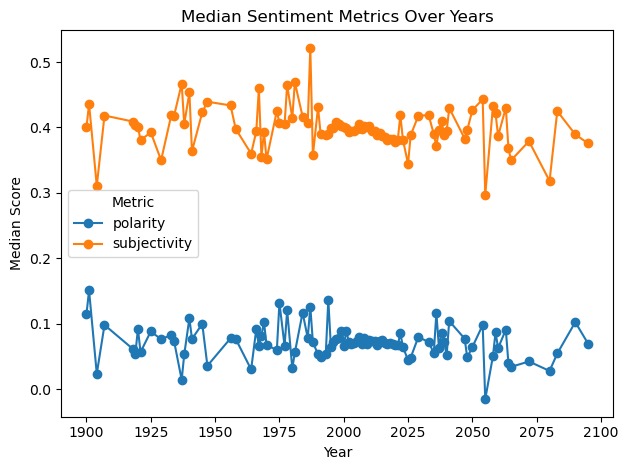

In [11]:
# Create a boxplot to visualize the overall distribution of sentiment polarity and subjectivity
plt.figure(figsize=(8, 6))
sns.boxplot(data=sentiment_df[['polarity', 'subjectivity']])
plt.title('Sentiment Distribution')
plt.ylabel('Score')
plt.show()
if df['year'].notnull().any():
    yearly_median = sentiment_df.groupby('year')[['polarity', 'subjectivity']].median()
    yearly_median.plot(marker='o')
    plt.title('Median Sentiment Metrics Over Years')
    plt.xlabel('Year')
    plt.ylabel('Median Score')
    plt.legend(title='Metric')
    plt.tight_layout()
plt.show()

In [12]:
# Sentiment and Readability Correlation Analysis
sentiment_df = pd.read_csv('sentiment_results.csv')
metadata_df = pd.read_csv(r"C:\Users\Kanis\Desktop\Python\Untitled Folder\policy-metadata\policy-metadata\policy-metadata.csv")
sentiment_df['hash'] = sentiment_df['filename'].apply(lambda x: x.replace('.txt', ''))
merged_df = pd.merge(sentiment_df, metadata_df, on='hash', how='inner')

# Display the first few rows to verify the merge result
print("Merged Data:")
merged_df.head()


Merged Data:


,filename,year_x,polarity,subjectivity,word_count,hash,Unnamed: 0,year_y,month,timestamp,...,count_privsh,count_safehar,count_truste,count_dpo,count_eprivacy,numpassive,numobfs,obfs_sents,waybackurl,policyid
0,0000180e47154fd3768cdc1b692f705231f04606dc6845...,2008.0,0.132114,0.409406,1096,0000180e47154fd3768cdc1b692f705231f04606dc6845...,90748,2008,7,20080706165041,...,0,2,0,0,0,7.0,75.0,31.0,https://web.archive.org/web/20080706165041/htt...,4334
1,0000a672c04a71dc90163dd77955c7b9fff3f09ec6c40d...,2007.0,0.090784,0.427093,1553,0000a672c04a71dc90163dd77955c7b9fff3f09ec6c40d...,245100,2008,8,20080806121908,...,0,0,1,0,0,6.0,160.0,34.0,https://web.archive.org/web/20080806121908/htt...,1858
2,0000a672c04a71dc90163dd77955c7b9fff3f09ec6c40d...,2007.0,0.090784,0.427093,1553,0000a672c04a71dc90163dd77955c7b9fff3f09ec6c40d...,245101,2008,9,20080907132312,...,0,0,1,0,0,6.0,160.0,34.0,https://web.archive.org/web/20080907132312/htt...,1858
3,0000a672c04a71dc90163dd77955c7b9fff3f09ec6c40d...,2007.0,0.090784,0.427093,1553,0000a672c04a71dc90163dd77955c7b9fff3f09ec6c40d...,245102,2008,10,20081031011828,...,0,0,1,0,0,6.0,160.0,34.0,https://web.archive.org/web/20081031011828/htt...,1858
4,000124f0b845ad3a28a2d62a07638225c47bbe27753472...,2010.0,0.089177,0.430850,3628,000124f0b845ad3a28a2d62a07638225c47bbe27753472...,549020,2010,11,20101123000821,...,0,0,1,0,0,21.0,359.0,105.0,https://web.archive.org/web/20101123000821/htt...,28276


Correlation Matrix:
              polarity  subjectivity    flesch        cl      smog
polarity      1.000000      0.377267  0.177152 -0.076529 -0.186158
subjectivity  0.377267      1.000000  0.214513 -0.187339 -0.234632
flesch        0.177152      0.214513  1.000000 -0.719876 -0.941081
cl           -0.076529     -0.187339 -0.719876  1.000000  0.627817
smog         -0.186158     -0.234632 -0.941081  0.627817  1.000000


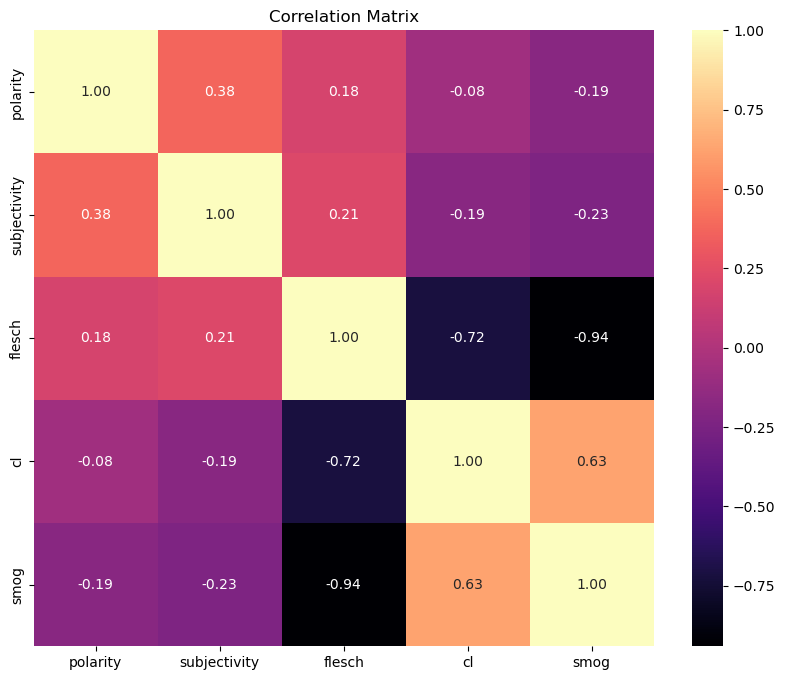

In [13]:
# Compute correlation matrix to explore how sentiment metrics relate to readability measures
correlation_matrix = merged_df[['polarity', 'subjectivity', 'flesch', 'cl', 'smog']].corr()

# Print correlation values 
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()